In [1]:
#Importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from pylab import bar, show, plot
import datetime
import random

In [2]:
#Read second file
df_usa=pd.read_csv('Data2.csv', parse_dates=['Country_Region'])
df_usa.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,121,128,130,133,133,133,133,135,135,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,11,13,13,13
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,620,683,725,788,897,903,923,974,1043,1068
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,45,50,51,51,51,51,51,51,51


In [3]:
# Grouping the file by a certain date) 
df_c = df_usa.groupby(['Province_State'], as_index=True)['4/12/2020'].sum().sort_values(ascending=False).head(10) 
df_c.head()

Province_State
New York         189033
New Jersey        61850
Massachusetts     25475
Michigan          24244
Pennsylvania      22938
Name: 4/12/2020, dtype: int64

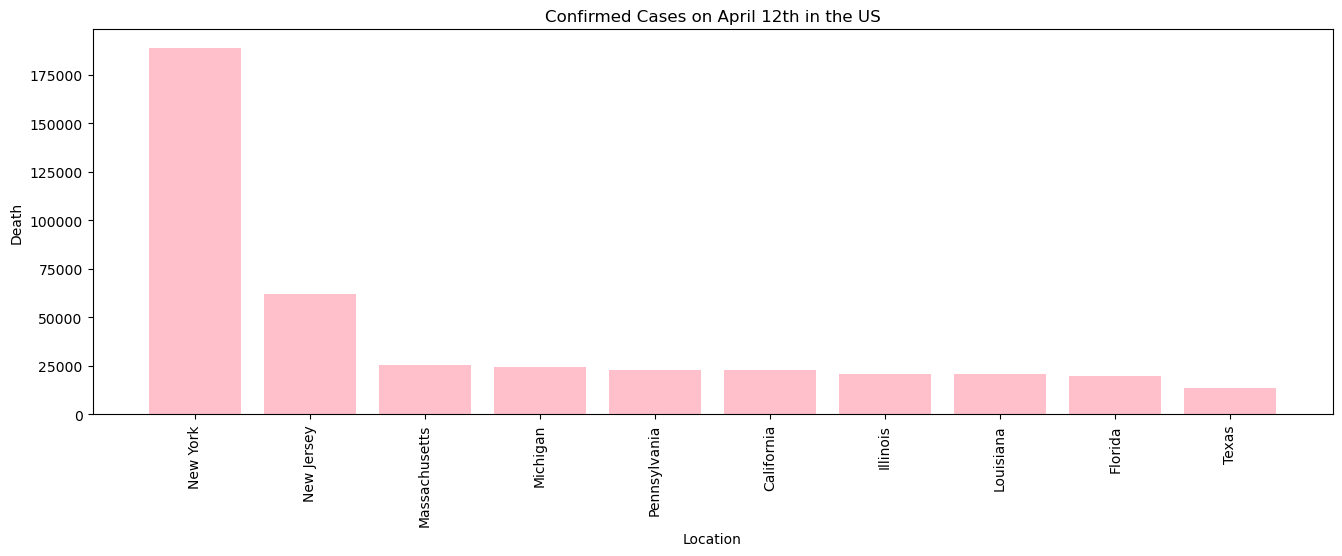

In [4]:
# Plot file for US States
def plot_plots(df_c, x, y, title="", xlabel='Location', ylabel='Death', m1_tlabel='', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.bar(x, y, color='pink')
    #plt.plot(x, z, color='red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90)
    
    plt.show()
# Here, the two datdaframes are combined
#df_two = pd.concat([df, df_smallcols])
plot_plots(df_c, x=df_c.index, y=df_c, title='Confirmed Cases on April 12th in the US')

In [5]:
# Checking the layout of the file
df_usa.shape

(3255, 98)

In [6]:
#Checking column names
df_usa.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020', '2/1/2020',
       '2/2/2020', '2/3/2020', '2/4/2020', '2/5/2020', '2/6/2020', '2/7/2020',
       '2/8/2020', '2/9/2020', '2/10/2020', '2/11/2020', '2/12/2020',
       '2/13/2020', '2/14/2020', '2/15/2020', '2/16/2020', '2/17/2020',
       '2/18/2020', '2/19/2020', '2/20/2020', '2/21/2020', '2/22/2020',
       '2/23/2020', '2/24/2020', '2/25/2020', '2/26/2020', '2/27/2020',
       '2/28/2020', '2/29/2020', '3/1/2020', '3/2/2020', '3/3/2020',
       '3/4/2020', '3/5/2020', '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020',
       '3/10/2020', '3/11/2020', '3/12/2020', '3/13/2020', '3/14/2020',
       '3/15/2020', '3/16/2020', '3/17/2020', '3/18/2020', '3/19/2020',
       '3/20/2020', '3/21/2020', '3/22/2020', '3/23/202

In [6]:
# Checking calculation for one row
row = 3252
#print("Growth of row named " + str(df_usa.loc[row]["Province_State"]) + ": " )
for i in range(13, df_usa.shape[1]):
    growth_value = df_usa.iloc[row][i] - df_usa.iloc[row][i-1]

In [7]:
# Copying, then dropping unneccessary columns for the copied file
df_gain = df_usa.copy()
df_gain = df_gain.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis = 1)
df_gain.shape

(3255, 89)

In [8]:
# Grouping the counties, states and numbers
df_group = df_gain.groupby(['Admin2', 'Province_State']).sum()
df_group.head(10)

1/22/2020  1/23/2020  1/24/2020  1/25/2020  \
Admin2    Province_State                                               
Abbeville South Carolina          0          0          0          0   
Acadia    Louisiana               0          0          0          0   
Accomack  Virginia                0          0          0          0   
Ada       Idaho                   0          0          0          0   
Adair     Iowa                    0          0          0          0   
          Kentucky                0          0          0          0   
          Missouri                0          0          0          0   
          Oklahoma                0          0          0          0   
Adams     Colorado                0          0          0          0   
          Idaho                   0          0          0          0   

                          1/26/2020  1/27/2020  1/28/2020  1/29/2020  \
Admin2    Province_State                                               
Abbeville South Carolina          0          0          0          0   
Acadia    Louisiana               0          0          0          0   
Accomack  Virginia                0          0          0          0   
Ada       Idaho                   0          0          0          0   
Adair     Iowa                    0          0          0          0   
          Kentucky                0          0          0          0   
          Missouri                0          0          0          0   
          Oklahoma                0          0          0          0   
Adams     Colorado                0          0          0          0   
          Idaho                   0          0          0          0   

                          1/30/2020  1/31/2020  ...  4/8/2020  4/9/2020  \
Admin2    Province_State                        ...                       
Abbeville South Carolina          0          0  ...         5         7   
Acadia    Louisiana               0          0  ...        86        89   
Accomack  Virginia                0          0  ...        11        11   
Ada       Idaho                   0          0  ...       438       447   
Adair     Iowa                    0          0  ...         1         1   
          Kentucky                0          0  ...         3         6   
          Missouri                0          0  ...        11        11   
          Oklahoma                0          0  ...        25        25   
Adams     Colorado                0          0  ...       417       417   
          Idaho                   0          0  ...         1         1   

                          4/10/2020  4/11/2020  4/12/2020  4/13/2020  \
Admin2    Province_State                                               
Abbeville South Carolina          7          9          9          9   
Acadia    Louisiana              94         98         99        101   
Accomack  Virginia               12         15         15         15   
Ada       Idaho                 495        513        517        517   
Adair     Iowa                    1          1          1          1   
          Kentucky                6          6         11         11   
          Missouri               11         11         11         11   
          Oklahoma               26         27         27         27   
Adams     Colorado              475        543        647        693   
          Idaho                   1          1          1          1   

                          4/14/2020  4/15/2020  4/16/2020  4/17/2020  
Admin2    Province_State                                              
Abbeville South Carolina          9         10         10         10  
Acadia    Louisiana             104        105        108        110  
Accomack  Virginia               15         15         19         28  
Ada       Idaho                 538        538        567        576  
Adair     Iowa                    1          1          1          1  
          Kentucky               

In [ ]:
# We will calculate gain using original data frame df_group and store it
# in df_gain
for row in range(2, df_group.shape[0]):
    for i in range(13, df_group.shape[1]):
        growth_value = df_group.iloc[row][i] - df_group.iloc[row][i-1]
        gain_col_index = 2 + (i-13)
        df_gain.at[row, gain_col_index] = growth_value
df_gain.to_csv('Growth.csv')

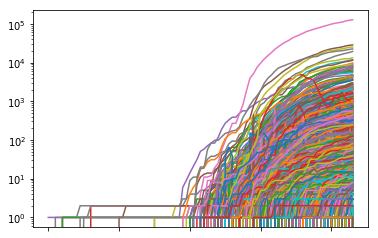

In [12]:
# Plotting the gain(s)
for row in range(2, df_group.shape[0]):
    s = df_group.iloc[row-1]
    s.plot(logy=True)